# Data Preparation

##### In this section, the data is cleaned and prepared, the power data is completed and merged with meteo data

### Import libraries and files

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sb

In [2]:
data2017_raw = pd.read_csv('/Users/joaosantos/Documents/MEFT/P3/SE/Project1/MyProject1/IST_North_Tower_2017.csv')
data2018_raw = pd.read_csv('/Users/joaosantos/Documents/MEFT/P3/SE/Project1/MyProject1/IST_North_Tower_2018.csv')
meteo_raw = pd.read_csv('/Users/joaosantos/Documents/MEFT/P3/SE/Project1/MyProject1/IST_meteo_data_2017_2018_2019.csv')

### Observe data

In [3]:
data2017_raw.head()

,Date_start,Power_kW
0,1-1-2017 0:00,42.996430
1,1-1-2017 1:00,42.751928
2,1-1-2017 2:00,42.861834
3,1-1-2017 3:00,42.317769
4,1-1-2017 4:00,42.653385


In [4]:
data2017_raw.tail()

,Date_start,Power_kW
8755,31-12-2017 19:00,43.511653
8756,31-12-2017 20:00,43.653022
8757,31-12-2017 21:00,41.317476
8758,31-12-2017 22:00,41.180039
8759,31-12-2017 23:00,41.287760


In [5]:
data2017_raw.shape

(8760, 2)

In [6]:
data2017_raw.dtypes

Date_start     object
Power_kW      float64
dtype: object

In [7]:
data2017_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date_start  8760 non-null   object 
 1   Power_kW    8760 non-null   float64
dtypes: float64(1), object(1)
memory usage: 137.0+ KB


In [8]:
meteo_raw.head()

,yyyy-mm-dd hh:mm:ss,temp_C,HR,windSpeed_m/s,windGust_m/s,pres_mbar,solarRad_W/m2,rain_mm/h,rain_day
0,2017-01-01 00:00:00,8.72,74.6,2.138,3.774,1029,1.163,0.0,0.0
1,2017-01-01 00:05:00,8.68,74.6,1.929,3.019,1029,1.496,0.0,0.0
2,2017-01-01 00:10:00,8.69,74.5,1.824,2.516,1029,1.025,0.0,0.0
3,2017-01-01 00:15:00,8.62,75.1,2.264,3.271,1029,1.690,0.0,0.0
4,2017-01-01 00:20:00,8.63,75.0,3.061,3.774,1029,1.108,0.0,0.0


In [9]:
meteo_raw.tail()

,yyyy-mm-dd hh:mm:ss,temp_C,HR,windSpeed_m/s,windGust_m/s,pres_mbar,solarRad_W/m2,rain_mm/h,rain_day
215004,2019-04-11 14:43:00,15.70,43.97,0.0,0.0,1021,348.0,0.0,0.0
215005,2019-04-11 14:48:00,15.35,44.42,0.0,0.0,1021,273.0,0.0,0.0
215006,2019-04-11 14:53:00,15.34,41.15,0.0,0.0,1021,320.9,0.0,0.0
215007,2019-04-11 15:18:00,15.26,42.01,0.0,0.0,1021,615.9,0.0,0.0
215008,2019-04-11 15:23:00,15.32,41.49,0.0,0.0,1021,423.6,0.0,0.0


In [10]:
meteo_raw.dtypes

yyyy-mm-dd hh:mm:ss     object
temp_C                 float64
HR                     float64
windSpeed_m/s          float64
windGust_m/s           float64
pres_mbar                int64
solarRad_W/m2          float64
rain_mm/h              float64
rain_day               float64
dtype: object

### Data cleaning and preparation

In [11]:
data2017_raw[data2017_raw.isnull().any(axis = 'columns')] #check if there are any NaN in data2017

,Date_start,Power_kW


In [12]:
data2018_raw[data2018_raw.isnull().any(axis = 'columns')] #check if there are any NaN in data2018

,Date_start,Power_kW


In [13]:
meteo_raw[meteo_raw.isnull().any(axis = 'columns')] #check if there are any NaN in meteo data

,yyyy-mm-dd hh:mm:ss,temp_C,HR,windSpeed_m/s,windGust_m/s,pres_mbar,solarRad_W/m2,rain_mm/h,rain_day


In [14]:
#meteo_raw = meteo_raw[~meteo_raw["yyyy-mm-dd hh:mm:ss"].str.contains("2019")] !could drop 2019 now but do it later
meteo_raw.tail()

,yyyy-mm-dd hh:mm:ss,temp_C,HR,windSpeed_m/s,windGust_m/s,pres_mbar,solarRad_W/m2,rain_mm/h,rain_day
215004,2019-04-11 14:43:00,15.70,43.97,0.0,0.0,1021,348.0,0.0,0.0
215005,2019-04-11 14:48:00,15.35,44.42,0.0,0.0,1021,273.0,0.0,0.0
215006,2019-04-11 14:53:00,15.34,41.15,0.0,0.0,1021,320.9,0.0,0.0
215007,2019-04-11 15:18:00,15.26,42.01,0.0,0.0,1021,615.9,0.0,0.0
215008,2019-04-11 15:23:00,15.32,41.49,0.0,0.0,1021,423.6,0.0,0.0


In [15]:
data2017=data2017_raw
data2017['Date_start']=pd.to_datetime(data2017['Date_start'], format='%d-%m-%Y %H:%M') #changing to datetime
data2017.rename(columns = {'Date_start': 'Date'}, inplace = True) #renaming date column

data2018=data2018_raw
data2018['Date_start']=pd.to_datetime(data2018['Date_start'], format='%d-%m-%Y %H:%M') 
data2018.rename(columns = {'Date_start': 'Date'}, inplace = True) 

meteo=meteo_raw
meteo['yyyy-mm-dd hh:mm:ss']=pd.to_datetime(meteo['yyyy-mm-dd hh:mm:ss'], format='%Y-%m-%d %H:%M:%S') 
meteo.rename(columns = {'yyyy-mm-dd hh:mm:ss': 'Date'}, inplace = True)

data2017.head()

,Date,Power_kW
0,2017-01-01 00:00:00,42.996430
1,2017-01-01 01:00:00,42.751928
2,2017-01-01 02:00:00,42.861834
3,2017-01-01 03:00:00,42.317769
4,2017-01-01 04:00:00,42.653385


In [16]:
data2017 = data2017.set_index ('Date', drop = True) #setting date as index
data2018 = data2018.set_index ('Date', drop = True)
meteo = meteo.set_index ('Date', drop = True)

In [17]:
print(data2017.index[data2017.index.duplicated(keep=False)]) #check for duplicates
print(data2018.index[data2018.index.duplicated(keep=False)]) 
print(meteo.index[meteo.index.duplicated(keep=False)]) 



DatetimeIndex(['2017-10-29 01:00:00', '2017-10-29 01:00:00'], dtype='datetime64[ns]', name='Date', freq=None)
DatetimeIndex(['2018-10-28 01:00:00', '2018-10-28 01:00:00'], dtype='datetime64[ns]', name='Date', freq=None)
DatetimeIndex(['2017-05-09 07:33:00', '2017-05-09 07:38:00',
               '2017-05-09 07:43:00', '2017-05-09 07:48:00',
               '2017-05-09 07:53:00', '2017-05-09 07:58:00',
               '2017-05-09 08:03:00', '2017-05-09 08:08:00',
               '2017-05-09 08:13:00', '2017-05-09 08:18:00',
               ...
               '2018-12-14 15:38:00', '2018-12-14 15:43:00',
               '2018-12-14 15:48:00', '2018-12-14 15:53:00',
               '2018-12-14 15:58:00', '2018-12-14 16:03:00',
               '2018-12-31 23:53:00', '2018-12-31 23:58:00',
               '2018-12-31 23:53:00', '2018-12-31 23:58:00'],
              dtype='datetime64[ns]', name='Date', length=1352, freq=None)


In [18]:
data2017 = data2017.groupby(data2017.index).mean() #does mean of duplicates
data2018 = data2018.groupby(data2018.index).mean() 

meteo = meteo.resample('H', closed='right', label='right').mean() #sets frequency of data to hourly, calculating the mean
meteo.index.freq = None #sets index freq back to None

print(data2017.index[data2017.index.duplicated(keep=False)]) #doublecheck for duplicates
print(data2018.index[data2018.index.duplicated(keep=False)])
print(meteo.index[meteo.index.duplicated(keep=False)])

DatetimeIndex([], dtype='datetime64[ns]', name='Date', freq=None)
DatetimeIndex([], dtype='datetime64[ns]', name='Date', freq=None)
DatetimeIndex([], dtype='datetime64[ns]', name='Date', freq=None)


/var/folders/fx/jrk_c9yx0476s6k5m7vj86v40000gn/T/ipykernel_8354/1366957148.py:4: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  meteo = meteo.resample('H', closed='right', label='right').mean() #sets frequency of data to hourly, calculating the mean


In [19]:
meteo = meteo[meteo.index.year != 2019] #drop 2019 data
meteo.tail()

,temp_C,HR,windSpeed_m/s,windGust_m/s,pres_mbar,solarRad_W/m2,rain_mm/h,rain_day
Date,,,,,,,,
2018-12-31 19:00:00,13.597500,54.752500,0.0,0.0,1030.5,1.243917,0.0,0.0
2018-12-31 20:00:00,13.361667,54.013333,0.0,0.0,1031.0,1.112333,0.0,0.0
2018-12-31 21:00:00,12.810000,55.441667,0.0,0.0,1031.0,1.322417,0.0,0.0
2018-12-31 22:00:00,12.565000,55.291667,0.0,0.0,1031.0,1.195500,0.0,0.0
2018-12-31 23:00:00,11.926667,56.530000,0.0,0.0,1031.0,1.117000,0.0,0.0


In [20]:
merged_data = pd.concat([data2017,data2018], axis=0) #merging power data from 2017 and 2018
merged_data 


,Power_kW
Date,
2017-01-01 00:00:00,42.996430
2017-01-01 01:00:00,42.751928
2017-01-01 02:00:00,42.861834
2017-01-01 03:00:00,42.317769
2017-01-01 04:00:00,42.653385
...,...
2018-12-31 19:00:00,70.132164
2018-12-31 20:00:00,58.661569
2018-12-31 21:00:00,43.897742


In [21]:
complete_index = pd.date_range(start=merged_data.index.min(), end=merged_data.index.max(), freq='H') #full date index
missing_dates = complete_index.difference(merged_data.index) #check if there are any missing dates in power

print(missing_dates)

DatetimeIndex(['2017-03-26 01:00:00', '2018-03-25 01:00:00'], dtype='datetime64[ns]', freq=None)


/var/folders/fx/jrk_c9yx0476s6k5m7vj86v40000gn/T/ipykernel_8354/2486259993.py:1: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  complete_index = pd.date_range(start=merged_data.index.min(), end=merged_data.index.max(), freq='H') #full date index


In [22]:
merged_data = merged_data.reindex(complete_index) 
merged_data['Power_kW']=merged_data['Power_kW'].interpolate(method='linear') #interpolation of missing dates

missing_dates = complete_index.difference(merged_data.index) #doubleckeck for missing dates
print(missing_dates)

print(meteo.index.equals(merged_data.index))  #checking if index match, should be true for perfect alignment

DatetimeIndex([], dtype='datetime64[ns]', freq='h')
True


In [23]:
data_clean = pd.concat([merged_data, meteo], axis=1) #merging power data with meteo data
data_clean

,Power_kW,temp_C,HR,windSpeed_m/s,windGust_m/s,pres_mbar,solarRad_W/m2,rain_mm/h,rain_day
2017-01-01 00:00:00,42.996430,8.720000,74.600000,2.138000,3.774000,1029.000000,1.163000,0.0,0.0
2017-01-01 01:00:00,42.751928,8.490000,75.000000,2.335833,3.228833,1029.000000,1.371250,0.0,0.0
2017-01-01 02:00:00,42.861834,7.877500,76.658333,2.776250,3.501250,1028.083333,1.581250,0.0,0.0
2017-01-01 03:00:00,42.317769,7.212417,80.441667,3.384083,4.193000,1028.000000,1.318083,0.0,0.0
2017-01-01 04:00:00,42.653385,6.817083,81.300000,3.490667,4.360667,1028.000000,1.569750,0.0,0.0
...,...,...,...,...,...,...,...,...,...
2018-12-31 19:00:00,70.132164,13.597500,54.752500,0.000000,0.000000,1030.500000,1.243917,0.0,0.0
2018-12-31 20:00:00,58.661569,13.361667,54.013333,0.000000,0.000000,1031.000000,1.112333,0.0,0.0
2018-12-31 21:00:00,43.897742,12.810000,55.441667,0.000000,0.000000,1031.000000,1.322417,0.0,0.0
2018-12-31 22:00:00,41.808445,12.565000,55.291667,0.000000,0.000000,1031.000000,1.195500,0.0,0.0


### Data saving and visualization

In [24]:
data_clean.to_csv('IST_North_Tower_Clean.csv', encoding='utf-8', index=True) 

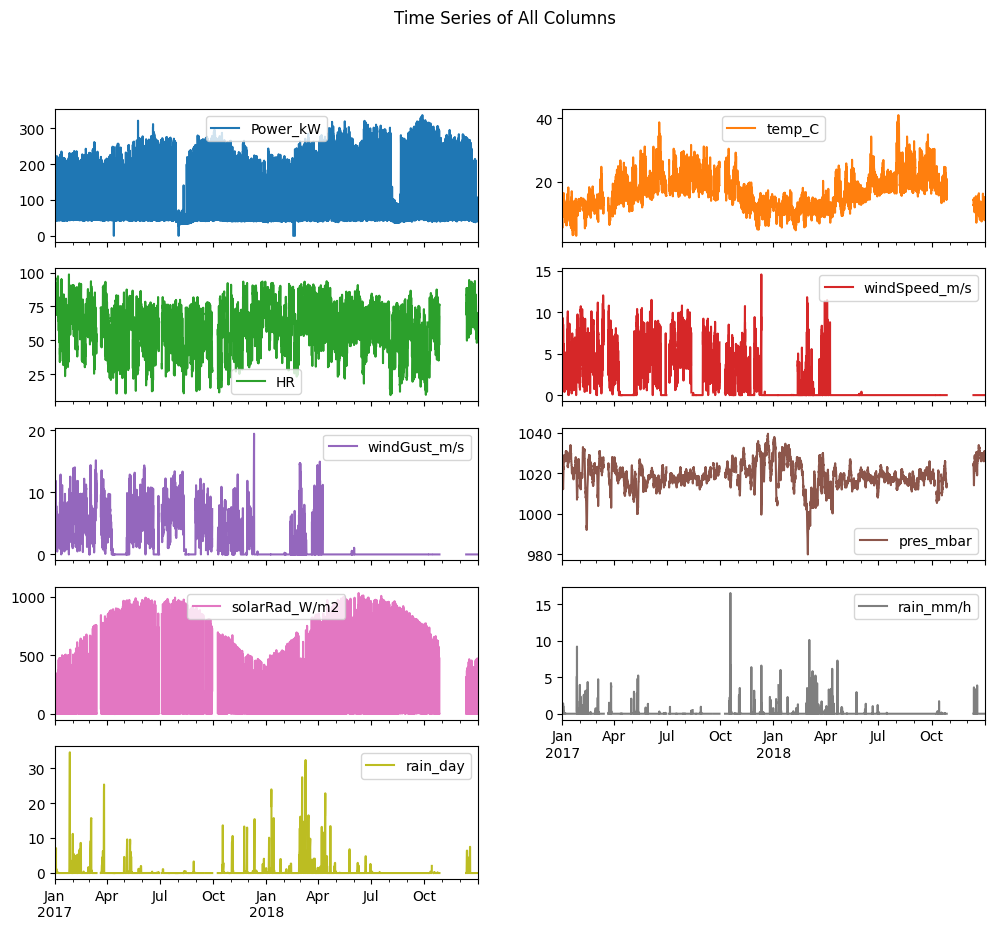

In [25]:
data_clean.plot(subplots=True, figsize=(12, 10), layout=(-1, 2)) 
plt.suptitle("Time Series of All Columns")
plt.show()

##### 
After preparing the data some conclusions can be made...

Low power data are probably incorrect measurements

Temperature data has some data missing

Wind has many values at 0, probably inaccurate measurements

All meteo data missing around november 2018

# Exploratory Data Analysis 

### Quick analysis

In [26]:
data_clean.describe()

,Power_kW,temp_C,HR,windSpeed_m/s,windGust_m/s,pres_mbar,solarRad_W/m2,rain_mm/h,rain_day
count,17520.000000,15385.000000,15385.000000,15385.000000,15385.000000,15385.000000,15385.000000,15385.000000,15385.000000
mean,108.459132,16.273135,60.010938,1.772040,2.278197,1018.991721,207.463721,0.050841,0.601170
std,85.004231,5.220173,17.334850,2.573459,3.280832,6.604351,285.119074,0.377051,2.543222
min,0.000000,2.948417,9.709167,0.000000,0.000000,979.916667,0.000000,0.000000,0.000000
25%,45.369395,12.369167,48.069167,0.000000,0.000000,1015.833333,1.705583,0.000000,0.000000
50%,54.293972,15.880000,62.315000,0.000000,0.000000,1019.000000,17.392083,0.000000,0.000000
75%,191.787665,19.449167,73.166667,3.522083,4.507417,1022.583333,376.625000,0.000000,0.000000
max,337.025762,40.979167,98.625000,14.568333,19.414167,1039.583333,1033.916667,16.523077,34.500000


In [27]:
data_sort_P = data_clean.sort_values(by = 'Power_kW', ascending = False)
data_sort_P [:9] # view first 10 entries

,Power_kW,temp_C,HR,windSpeed_m/s,windGust_m/s,pres_mbar,solarRad_W/m2,rain_mm/h,rain_day
2018-09-27 15:00:00,337.025762,29.097500,31.530833,0.0,0.0,1023.666667,717.075000,0.0,0.0
2018-09-27 16:00:00,336.772520,29.984167,29.925833,0.0,0.0,1023.000000,624.425000,0.0,0.0
2018-09-26 16:00:00,334.446806,30.604167,29.075000,0.0,0.0,1021.000000,631.558333,0.0,0.0
2018-09-27 14:00:00,331.142868,28.399167,34.484167,0.0,0.0,1024.750000,752.500000,0.0,0.0
2018-09-25 15:00:00,330.674404,28.235833,29.335833,0.0,0.0,1019.000000,729.833333,0.0,0.0
2018-09-26 17:00:00,329.629319,29.580833,30.550000,0.0,0.0,1021.000000,482.516667,0.0,0.0
2018-09-24 15:00:00,329.225530,32.901667,18.711667,0.0,0.0,1019.000000,747.416667,0.0,0.0
2018-09-24 14:00:00,328.993046,30.595833,22.718333,0.0,0.0,1019.916667,773.166667,0.0,0.0
2018-09-24 16:00:00,328.797926,34.045833,16.925000,0.0,0.0,1018.166667,660.016667,0.0,0.0


In [28]:
data_sort_P = data_clean.sort_values(by = 'Power_kW', ascending = True)
data_sort_P [:9] # view last 10 entries

,Power_kW,temp_C,HR,windSpeed_m/s,windGust_m/s,pres_mbar,solarRad_W/m2,rain_mm/h,rain_day
2017-04-12 21:00:00,0.0,17.458333,47.461667,0.000000,0.00000,1019.250000,0.000000,0.0,0.0
2018-02-18 17:00:00,0.0,15.872500,25.879167,0.000000,0.00000,1021.000000,291.491667,0.0,0.0
2018-02-18 16:00:00,0.0,16.064167,30.152500,0.000000,0.00000,1021.000000,453.258333,0.0,0.0
2018-02-18 15:00:00,0.0,15.930000,32.568333,0.000000,0.00000,1021.000000,573.641667,0.0,0.0
2018-02-18 13:00:00,0.0,13.688333,42.900000,0.000000,0.00000,1022.750000,642.708333,0.0,0.0
2018-02-18 12:00:00,0.0,12.350833,45.234167,0.000000,0.00000,1023.333333,590.450000,0.0,0.0
2018-02-18 11:00:00,0.0,11.025833,45.664167,0.000000,0.00000,1024.000000,483.158333,0.0,0.0
2018-02-18 10:00:00,0.0,10.500000,45.799167,0.000000,0.00000,1024.000000,331.675000,0.0,0.0
2018-02-18 09:00:00,0.0,10.387500,46.143333,0.082083,0.44025,1024.000000,156.366667,0.0,0.0


##### No apparent high outlier in power but power at 0 probably outlier

### Boxplots

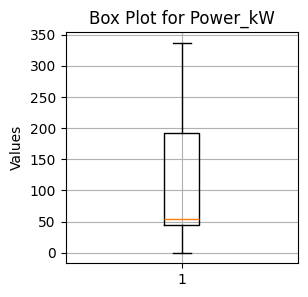

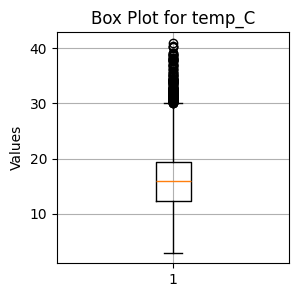

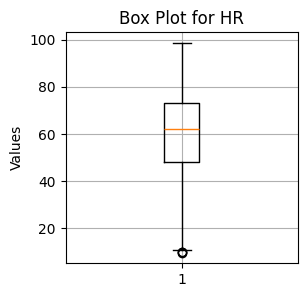

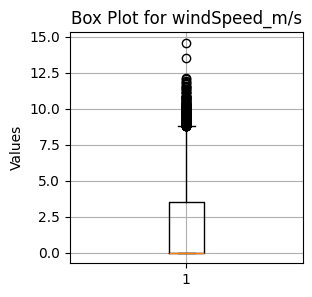

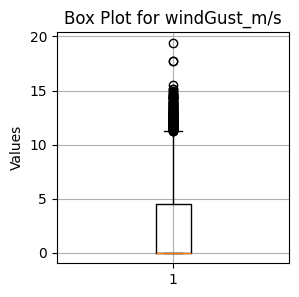

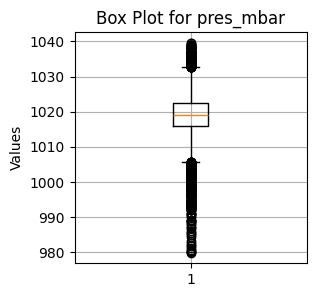

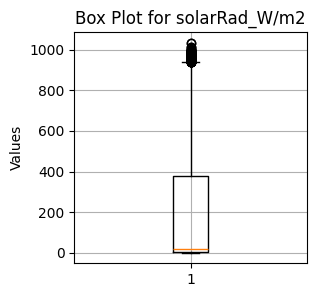

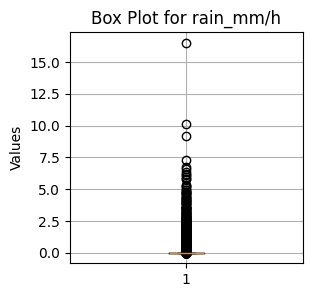

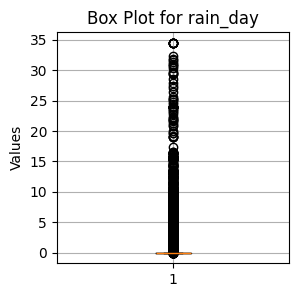

In [29]:
for col in data_clean.columns:
    plt.figure(figsize=(3, 3))  # Figure for each column
    plt.boxplot(data_clean[col].dropna())  # Drop NaNs to avoid errors
    plt.title(f"Box Plot for {col}")
    plt.ylabel("Values")
    plt.grid()
    plt.show()

##### Boxplots show no apparent outlier again for power. Meteo data show many apparent outliers but it is decided not to delete them for now since these high and low values represent real data and can be useful for the model to predict days with rare conditions

### Outliers with zscore and IQR

In [30]:
from scipy import stats
z = np.abs(stats.zscore(data_clean['Power_kW']))
threshold = 3 # 3 sigma...Includes 99.7% of the data
print(np.where(z > 3))

(array([], dtype=int64),)


In [31]:
Q1 = data_clean['Power_kW'].quantile(0.25)
Q3 = data_clean['Power_kW'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)
print(data_clean[(data_clean['Power_kW'] < (Q1 - 1.5 * IQR)) | (data_clean['Power_kW'] > (Q3 + 1.5 * IQR))]) 


146.41827024999998
Empty DataFrame
Columns: [Power_kW, temp_C, HR, windSpeed_m/s, windGust_m/s, pres_mbar, solarRad_W/m2, rain_mm/h, rain_day]
Index: []


##### No outliers identified with IQR or zscore

### Removing Outliers visually

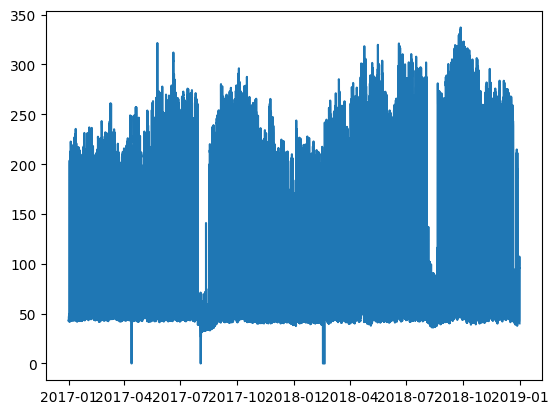

In [32]:
plt.plot(data_clean['Power_kW'])

#very low power are only isolated points, we can delete manually

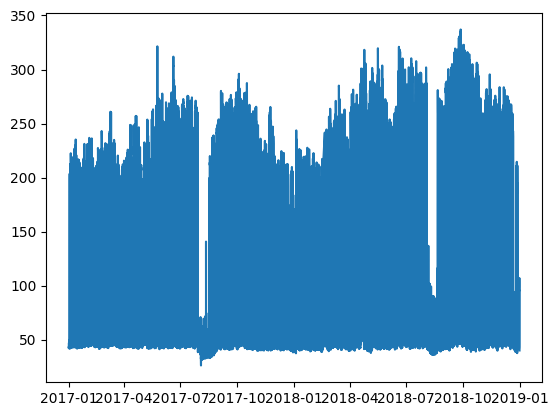

In [33]:
data_clean.loc[data_clean['Power_kW'] <=25,'Power_kW']=np.nan
data_clean['Power_kW']=data_clean['Power_kW'].interpolate(method='linear') 
plt.plot(data_clean['Power_kW'])

#interpolate all points below 25 kW

##### Very low power data are inaccurate measurements, it was decided to delete them and interpolate the dates then missing 

# Feature Selection

##### In this section, a Preliminary Feature Selection is made with meteo data. These features are completed and others are added in the section Feature Engineering. All features are analyzed with Ensemble and Wrapper methods 

## Preliminary feature selection

### Pearson's

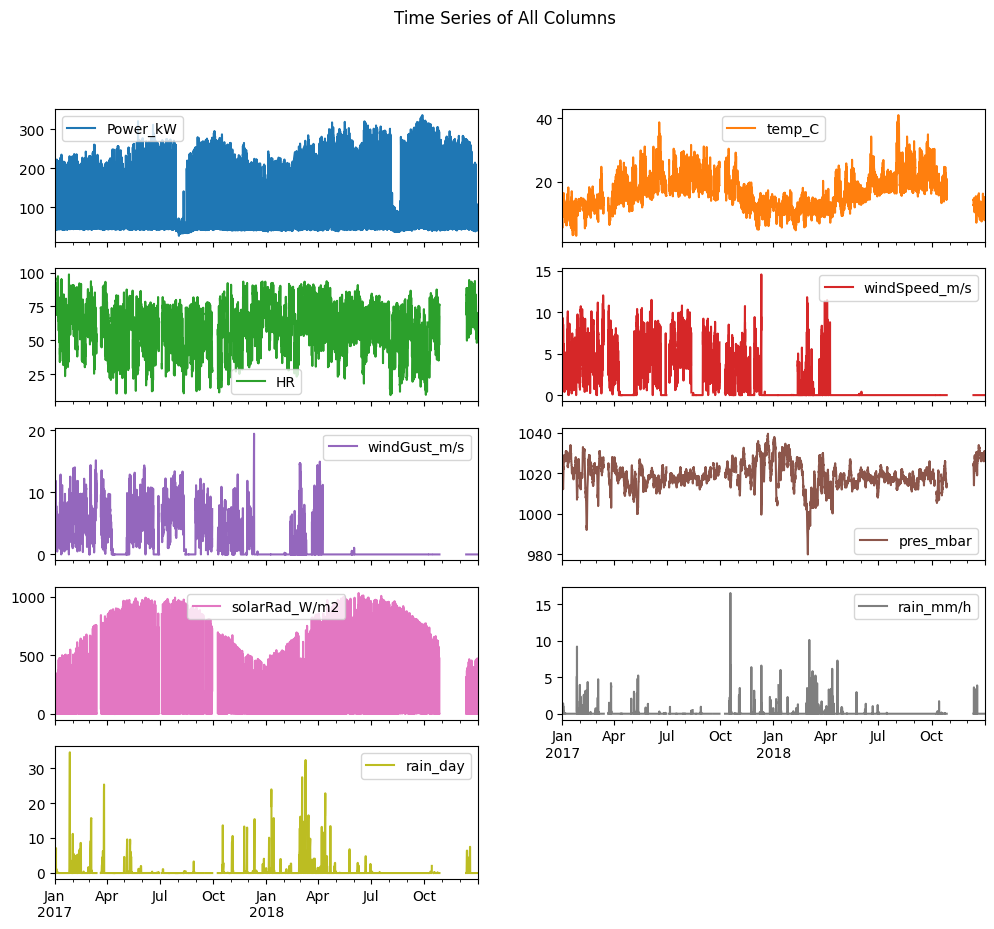

In [34]:
data_clean.plot(subplots=True, figsize=(12, 10), layout=(-1, 2)) 
plt.suptitle("Time Series of All Columns")
plt.show()

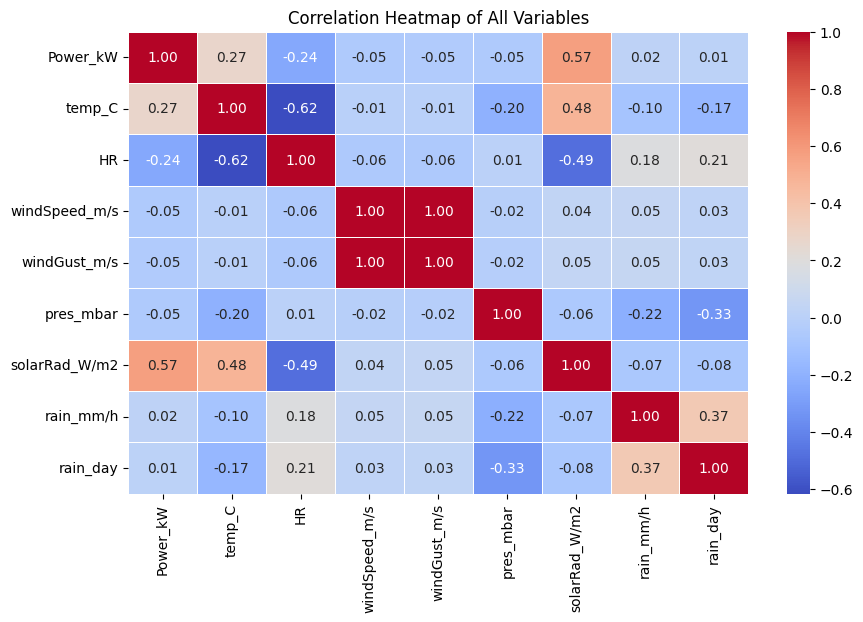

In [35]:

data_dropped=data_clean.dropna()
correlation_matrix = data_dropped.corr() #By default uses Pearson correlation (linear relationship)

plt.figure(figsize=(10, 6))
sb.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of All Variables")
plt.show()

##### There was a whole month missing in november 2018, every NaN was deleted to first to select the most important meteo features.

Solar irradiance, HR and Temperature have the highest absolute correlations. HR has negative correlation with Power, Temperature and Solar Radiance which makes it a good parameter to have 


### F-test

solarRad_W/m2: 7435.61592806048
temp_C: 1246.5839752685147
HR: 972.8139159570172
windSpeed_m/s: 43.73386990009727
pres_mbar: 43.252228948014675
windGust_m/s: 33.62873530699362
rain_mm/h: 4.892229715502444
rain_day: 1.6715255623584615


<BarContainer object of 8 artists>

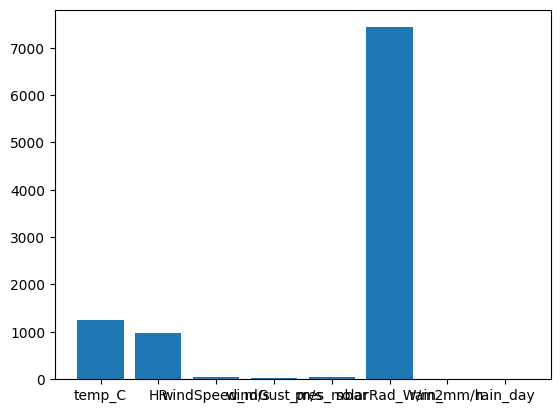

In [36]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression # score metric (f_regression), uses f-test ANOVA

features=SelectKBest(k=3,score_func=f_regression)

Z=data_dropped.values
Y=Z[:,0] #power target values
X=Z[:,[1,2,3,4,5,6,7,8]]

fit=features.fit(X,Y) #calculates the scores using the score_function f_regression of the features

# Print sorted feature scores
feature_names = data_dropped.columns[1:]  # Exclude the first column (Y)
feature_scores = dict(zip(feature_names, fit.scores_))  # Map feature names to scores
sorted_features = sorted(feature_scores.items(), key=lambda x: x[1], reverse=True)
for feature, score in sorted_features:
    print(f"{feature}: {score}")

plt.bar(feature_names, fit.scores_)

#features_results=fit.transform(X)
#print(features_results)

##### f-regression confirms Solar radiance, Temperature and HR as the best features. the others have very low scores.

### Mutual information

[0.18028506 0.08141462 0.04586652 0.0478249  0.09250203 0.42455562
 0.00673806 0.03547248]
solarRad_W/m2: 0.42455561775115314
temp_C: 0.1802850555759017
pres_mbar: 0.09250203009952696
HR: 0.08141461979982001
windGust_m/s: 0.047824898262514015
windSpeed_m/s: 0.04586652203051944
rain_day: 0.035472476236309225
rain_mm/h: 0.0067380638624938705


<BarContainer object of 8 artists>

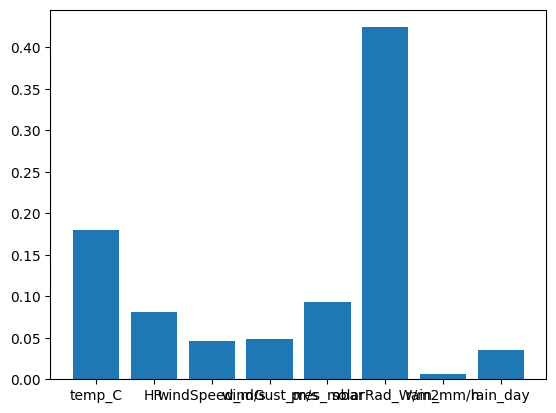

In [37]:
from sklearn.feature_selection import mutual_info_regression
features=SelectKBest(k=3,score_func=mutual_info_regression) #Mutual information captures non-linear dependencies

fit=features.fit(X,Y) 
print(fit.scores_)

# Print sorted feature scores
feature_names = data_dropped.columns[1:]  # Exclude the first column (Y)
feature_scores = dict(zip(feature_names, fit.scores_))  # Map feature names to scores
sorted_features = sorted(feature_scores.items(), key=lambda x: x[1], reverse=True)
for feature, score in sorted_features:
    print(f"{feature}: {score}")

plt.bar(feature_names, fit.scores_)

#features_results=fit.transform(X) 
#print(features_results)  

In [38]:
data_clean = data_clean.drop(columns=['windSpeed_m/s', 'windGust_m/s', 'pres_mbar', 'rain_mm/h', 'rain_day'])

##### Mutual regression agrees with f-test. Solar radiance, temperature and HR as the best features and also includes pressure
Only Temperature, Solar radiance and HR are selected as features for now. These features have the best correlation and best scores with f-test and mutual information. These features are also easier to complete because show a defined behaviour while the others are more random.

## Feature Engineering

### Complete Features

In [39]:
data_clean[data_clean['temp_C'].isna()] #NaN in temperature

,Power_kW,temp_C,HR,solarRad_W/m2
2017-01-30 23:00:00,50.035189,NaN,NaN,NaN
2017-01-31 00:00:00,46.809474,NaN,NaN,NaN
2017-01-31 01:00:00,45.326951,NaN,NaN,NaN
2017-01-31 02:00:00,45.057541,NaN,NaN,NaN
2017-01-31 03:00:00,44.952224,NaN,NaN,NaN
...,...,...,...,...
2018-12-12 02:00:00,47.353538,NaN,NaN,NaN
2018-12-12 03:00:00,47.862643,NaN,NaN,NaN
2018-12-12 04:00:00,46.035765,NaN,NaN,NaN
2018-12-12 05:00:00,59.474826,NaN,NaN,NaN


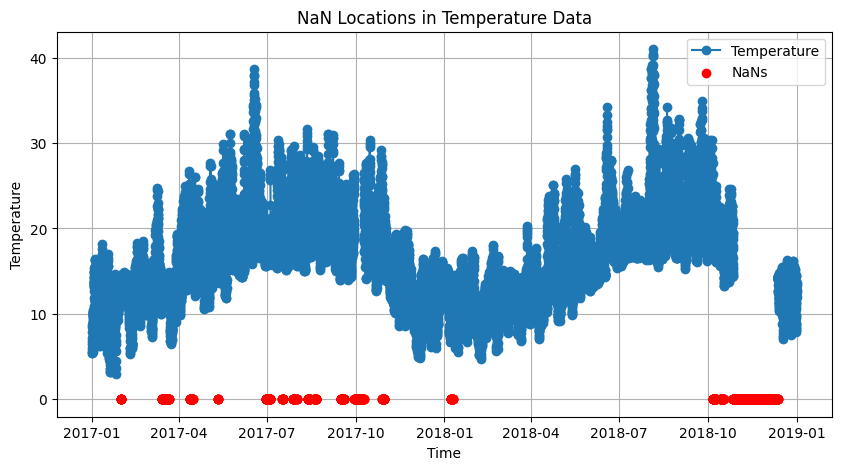

In [40]:
plt.figure(figsize=(10,5))
plt.plot(data_clean.index, data_clean['temp_C'], marker='o', linestyle='-', label="Temperature")
plt.scatter(data_clean.index[data_clean['temp_C'].isna()], 
            [0]*data_clean['temp_C'].isna().sum(), 
            color='red', label="NaNs", zorder=3)
plt.xlabel("Time")
plt.ylabel("Temperature")
plt.legend()
plt.title("NaN Locations in Temperature Data")
plt.grid()
plt.show()

In [41]:
nan_mask = data_clean['temp_C'].isna() #NaN mask

# Identify where NaN sequences start and end
nan_starts = nan_mask & ~nan_mask.shift(1, fill_value=False)  # First NaN in a sequence
nan_ends = nan_mask & ~nan_mask.shift(-1, fill_value=False)  # Last NaN in a sequence

# Get indices of NaN start and end points
start_indices = data_clean.index[nan_starts]
end_indices = data_clean.index[nan_ends]

# Print results with duration
for start, end in zip(start_indices, end_indices):
    duration = end - start  # Compute duration as a timedelta
    duration_days = duration.days  # Convert to days
    duration_hours = duration.total_seconds() / 3600  # Convert to hours

    print(f"NaN period: Start = {start}, End = {end}, Duration = {duration_days} days ({duration_hours:.2f} hours)")

NaN period: Start = 2017-01-30 23:00:00, End = 2017-01-31 09:00:00, Duration = 0 days (10.00 hours)
NaN period: Start = 2017-03-14 00:00:00, End = 2017-03-21 07:00:00, Duration = 7 days (175.00 hours)
NaN period: Start = 2017-04-12 03:00:00, End = 2017-04-12 14:00:00, Duration = 0 days (11.00 hours)
NaN period: Start = 2017-04-13 18:00:00, End = 2017-04-15 02:00:00, Duration = 1 days (32.00 hours)
NaN period: Start = 2017-05-11 02:00:00, End = 2017-05-11 07:00:00, Duration = 0 days (5.00 hours)
NaN period: Start = 2017-06-30 01:00:00, End = 2017-07-04 14:00:00, Duration = 4 days (109.00 hours)
NaN period: Start = 2017-07-17 02:00:00, End = 2017-07-17 14:00:00, Duration = 0 days (12.00 hours)
NaN period: Start = 2017-07-28 10:00:00, End = 2017-07-29 01:00:00, Duration = 0 days (15.00 hours)
NaN period: Start = 2017-07-31 18:00:00, End = 2017-07-31 22:00:00, Duration = 0 days (4.00 hours)
NaN period: Start = 2017-08-12 05:00:00, End = 2017-08-14 09:00:00, Duration = 2 days (52.00 hours)


In [42]:
# Fill NaNs in temp_C using the previous year's data (2018 with 2017 & 2017 with 2018)
data_clean['temp_C'] = data_clean['temp_C'].fillna(data_clean['temp_C'].shift(8760))
data_clean['temp_C'] = data_clean['temp_C'].fillna(data_clean['temp_C'].shift(-8760))

# Fill any remaining NaNs using interpolation
data_clean['temp_C'] = data_clean['temp_C'].interpolate()

# Check remaining NaNs
print("Remaining NaNs in temp_C:", data_clean['temp_C'].isna().sum())  # Should be 0 if all NaNs are filled
#data_clean[data_clean['temp_C'].isna()]


# Fill NaNs in solarRad_W/m2 using the previous year's data (2018 with 2017 & 2017 with 2018)
data_clean['solarRad_W/m2'] = data_clean['solarRad_W/m2'].fillna(data_clean['solarRad_W/m2'].shift(8760))
data_clean['solarRad_W/m2'] = data_clean['solarRad_W/m2'].fillna(data_clean['solarRad_W/m2'].shift(-8760))

# Fill any remaining NaNs using interpolation
data_clean['solarRad_W/m2'] = data_clean['solarRad_W/m2'].interpolate()

# Check remaining NaNs
print("Remaining NaNs in solarRad_W/m2:", data_clean['solarRad_W/m2'].isna().sum())  # Should be 0 if all NaNs are filled


# Fill NaNs in HR using the previous year's data (2018 with 2017 & 2017 with 2018)
data_clean['HR'] = data_clean['HR'].fillna(data_clean['HR'].shift(8760))
data_clean['HR'] = data_clean['HR'].fillna(data_clean['HR'].shift(-8760))

# Fill any remaining NaNs using interpolation
data_clean['HR'] = data_clean['HR'].interpolate()

# Check remaining NaNs
print("Remaining NaNs in HR:", data_clean['HR'].isna().sum())  # Should be 0 if all NaNs are filled

Remaining NaNs in temp_C: 0
Remaining NaNs in solarRad_W/m2: 0
Remaining NaNs in HR: 0


##### First the locations of NaN data in temp_C are visualized and identified. Then the NaN in temp_C, solar_rad and HR are filled with data from the other year, where there is not data in any year the data is filled with interpolation. We can do this since these data show an oscilating and seasonal pattern. In fact, the NaN data represents a small fraction and this completion will not have huge impact.  

### Add Features

In [43]:
data_clean

,Power_kW,temp_C,HR,solarRad_W/m2
2017-01-01 00:00:00,42.996430,8.720000,74.600000,1.163000
2017-01-01 01:00:00,42.751928,8.490000,75.000000,1.371250
2017-01-01 02:00:00,42.861834,7.877500,76.658333,1.581250
2017-01-01 03:00:00,42.317769,7.212417,80.441667,1.318083
2017-01-01 04:00:00,42.653385,6.817083,81.300000,1.569750
...,...,...,...,...
2018-12-31 19:00:00,70.132164,13.597500,54.752500,1.243917
2018-12-31 20:00:00,58.661569,13.361667,54.013333,1.112333
2018-12-31 21:00:00,43.897742,12.810000,55.441667,1.322417
2018-12-31 22:00:00,41.808445,12.565000,55.291667,1.195500


In [44]:
data_clean['Power-1']=data_clean['Power_kW'].shift(1) # Add previous hour consumption
data_clean.loc[data_clean.index[0], 'Power-1'] = data_clean.iloc[1]['Power-1'] #Fill NaN value with first value, at night does not change much

data_clean['Power-2']=data_clean['Power_kW'].shift(2) # Add Power 2 hours ago
data_clean.loc[data_clean.index[0], 'Power-2'] = data_clean.iloc[2]['Power-2']
data_clean.loc[data_clean.index[1], 'Power-2'] = data_clean.iloc[2]['Power-2'] #Fill NaN values with first value

data_clean['Power-24'] = data_clean['Power_kW'].shift(24) # Add Power 24 hours ago
data_clean['Power-24'].fillna(data_clean['Power_kW'], inplace=True) # Fill NaN values in with 'Power_kW' value

data_clean['Power-7'] = data_clean['Power_kW'].shift(168) # Add Power 1 weak ago
data_clean['Power-7'].fillna(data_clean['Power_kW'], inplace=True) # Fill NaN values in  with 'Power_kW' value

data_clean['Power_7mean'] = data_clean['Power_kW'].rolling(window=7*24, min_periods=1).mean()  #7-day Moving Average of Power

/var/folders/fx/jrk_c9yx0476s6k5m7vj86v40000gn/T/ipykernel_8354/1279391985.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_clean['Power-24'].fillna(data_clean['Power_kW'], inplace=True) # Fill NaN values in with 'Power_kW' value
/var/folders/fx/jrk_c9yx0476s6k5m7vj86v40000gn/T/ipykernel_8354/1279391985.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work becaus

In [45]:
data_clean['Weekday'] = data_clean.index.weekday # Add a 'Weekday' column (0 = Monday, 6 = Sunday)
data_clean['Hour'] = data_clean.index.hour # Add an 'Hour' column (0-23)
amp=1/24
time=data_clean['Hour'].values
data_clean['Sin_hour'] = 10 * np.sin(2 * np.pi * amp * time -8) #Add sin hour
data_clean['Cos_hour'] = 10 * np.cos(2 * np.pi * amp * time -8) #Add cos hour

In [46]:
data_clean['logtemp']=np.log(data_clean['temp_C']) # Add Log of temperature
data_clean['HDH']=np.maximum(0,-data_clean['temp_C']+16) # Add Heating degree.hour

In [47]:
import holidays
portugal_holidays = holidays.Portugal(years=[2017, 2018]) # Define Portugal holidays (includes Lisbon-specific holidays)
data_clean['Holiday'] = data_clean.index.map(lambda x: 1 if x.date() in portugal_holidays else 0) # 1 if the date is a holiday, 0 otherwise

# Periods where there are not activities teaching activities at IST
periods = [
    ("2017-02-05", "2017-02-19"), #EndSemester
    ("2017-02-27", "2017-02-28"), #Carnival
    ("2017-04-10", "2017-04-14"), #Easter
    ("2017-07-29", "2017-09-10"), #Summer
    ("2017-12-23", "2018-01-01"), #Christmas
    ("2018-02-04", "2018-02-18"), #EndSemester
    ("2018-03-26", "2018-03-30"), #Easter
    ("2018-07-28", "2018-09-09"), #Summer
    ("2018-12-22", "2018-12-31")  #Christmas
]

periods = [(pd.to_datetime(start), pd.to_datetime(end)) for start, end in periods] # Convert to datetime

# Create a column NoClasses: 1 if the date is within any period, 0 otherwise
data_clean['NoClasses'] = data_clean.index.map(lambda x: any(start.date() <= x.date() <= end.date() for start, end in periods)).astype(int)
data_clean['NoClasses'] = data_clean['NoClasses'] | data_clean['Holiday']

data_clean

,Power_kW,temp_C,HR,solarRad_W/m2,Power-1,Power-2,Power-24,Power-7,Power_7mean,Weekday,Hour,Sin_hour,Cos_hour,logtemp,HDH,Holiday,NoClasses
2017-01-01 00:00:00,42.996430,8.720000,74.600000,1.163000,42.996430,42.996430,42.996430,42.996430,42.996430,6,0,-9.893582,-1.455000,2.165619,7.280000,1,1
2017-01-01 01:00:00,42.751928,8.490000,75.000000,1.371250,42.996430,42.996430,42.751928,42.751928,42.874179,6,1,-9.933049,1.155225,2.138889,7.510000,1,1
2017-01-01 02:00:00,42.861834,7.877500,76.658333,1.581250,42.751928,42.996430,42.861834,42.861834,42.870064,6,2,-9.295594,3.686724,2.064011,8.122500,1,1
2017-01-01 03:00:00,42.317769,7.212417,80.441667,1.318083,42.861834,42.751928,42.317769,42.317769,42.731990,6,3,-8.024660,5.966979,1.975804,8.787583,1,1
2017-01-01 04:00:00,42.653385,6.817083,81.300000,1.569750,42.317769,42.861834,42.653385,42.653385,42.716269,6,4,-6.206858,7.840594,1.919432,9.182917,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-31 19:00:00,70.132164,13.597500,54.752500,1.243917,102.898642,107.208991,47.601318,71.888248,76.935521,0,19,-1.155225,-9.933049,2.609886,2.402500,0,1
2018-12-31 20:00:00,58.661569,13.361667,54.013333,1.112333,70.132164,102.898642,47.871384,56.508252,76.948339,0,20,-3.686724,-9.295594,2.592390,2.638333,0,1
2018-12-31 21:00:00,43.897742,12.810000,55.441667,1.322417,58.661569,70.132164,45.990754,41.890383,76.960287,0,21,-5.966979,-8.024660,2.550226,3.190000,0,1
2018-12-31 22:00:00,41.808445,12.565000,55.291667,1.195500,43.897742,58.661569,45.572764,39.143183,76.976152,0,22,-7.840594,-6.206858,2.530915,3.435000,0,1


In [48]:
data_clean=data_clean.iloc[:, [0,4,5,6,7,8,10,11,12,9,15,16,1,13,14,3,2]] #Sorting columns
data_clean

,Power_kW,Power-1,Power-2,Power-24,Power-7,Power_7mean,Hour,Sin_hour,Cos_hour,Weekday,Holiday,NoClasses,temp_C,logtemp,HDH,solarRad_W/m2,HR
2017-01-01 00:00:00,42.996430,42.996430,42.996430,42.996430,42.996430,42.996430,0,-9.893582,-1.455000,6,1,1,8.720000,2.165619,7.280000,1.163000,74.600000
2017-01-01 01:00:00,42.751928,42.996430,42.996430,42.751928,42.751928,42.874179,1,-9.933049,1.155225,6,1,1,8.490000,2.138889,7.510000,1.371250,75.000000
2017-01-01 02:00:00,42.861834,42.751928,42.996430,42.861834,42.861834,42.870064,2,-9.295594,3.686724,6,1,1,7.877500,2.064011,8.122500,1.581250,76.658333
2017-01-01 03:00:00,42.317769,42.861834,42.751928,42.317769,42.317769,42.731990,3,-8.024660,5.966979,6,1,1,7.212417,1.975804,8.787583,1.318083,80.441667
2017-01-01 04:00:00,42.653385,42.317769,42.861834,42.653385,42.653385,42.716269,4,-6.206858,7.840594,6,1,1,6.817083,1.919432,9.182917,1.569750,81.300000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-31 19:00:00,70.132164,102.898642,107.208991,47.601318,71.888248,76.935521,19,-1.155225,-9.933049,0,0,1,13.597500,2.609886,2.402500,1.243917,54.752500
2018-12-31 20:00:00,58.661569,70.132164,102.898642,47.871384,56.508252,76.948339,20,-3.686724,-9.295594,0,0,1,13.361667,2.592390,2.638333,1.112333,54.013333
2018-12-31 21:00:00,43.897742,58.661569,70.132164,45.990754,41.890383,76.960287,21,-5.966979,-8.024660,0,0,1,12.810000,2.550226,3.190000,1.322417,55.441667
2018-12-31 22:00:00,41.808445,43.897742,58.661569,45.572764,39.143183,76.976152,22,-7.840594,-6.206858,0,0,1,12.565000,2.530915,3.435000,1.195500,55.291667


## Ensemble Methods

In [49]:
Z=data_clean.values

Y=Z[:,0]
X=Z[:,[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16]] 

In [50]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

model=LinearRegression() # LinearRegression Model as Estimator
rfe1=RFE(model,n_features_to_select=1)# using 1 features
rfe2=RFE(model,n_features_to_select=2) # using 2 features
rfe3=RFE(model,n_features_to_select=3)# using 3 features
fit1=rfe1.fit(X,Y)
fit2=rfe2.fit(X,Y)
fit3=rfe3.fit(X,Y)

print( "Feature Ranking (Linear Model, 1 features): %s" % (fit1.ranking_)) #logtemp
print( "Feature Ranking (Linear Model, 2 features): %s" % (fit2.ranking_)) #logtemp, noclasses 
print( "Feature Ranking (Linear Model, 3 features): %s" % (fit3.ranking_)) #logtemp, noclasses, Holiday


Feature Ranking (Linear Model, 1 features): [ 6 11 13  7 14 10  4  5  9  3  2  8  1 12 16 15]
Feature Ranking (Linear Model, 2 features): [ 5 10 12  6 13  9  3  4  8  2  1  7  1 11 15 14]
Feature Ranking (Linear Model, 3 features): [ 4  9 11  5 12  8  2  3  7  1  1  6  1 10 14 13]


## Wrapper Methods

In [51]:
from sklearn.ensemble import RandomForestRegressor

[8.29681661e-01 6.23054552e-03 1.15752571e-02 1.07760012e-01
 2.86438041e-03 1.57669109e-02 1.10385730e-03 1.42150785e-02
 1.94369349e-03 2.30800395e-03 5.15037534e-04 1.06546948e-03
 1.08656779e-03 5.65922780e-04 2.30994890e-03 1.00765271e-03]


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 [Text(0, 0, 'Power-1'),
  Text(1, 0, 'Power-2'),
  Text(2, 0, 'Power-24'),
  Text(3, 0, 'Power-7'),
  Text(4, 0, 'Power_7mean'),
  Text(5, 0, 'Hour'),
  Text(6, 0, 'Sin_hour'),
  Text(7, 0, 'Cos_hour'),
  Text(8, 0, 'Weekday'),
  Text(9, 0, 'Holiday'),
  Text(10, 0, 'NoClasses'),
  Text(11, 0, 'temp_C'),
  Text(12, 0, 'logtemp'),
  Text(13, 0, 'HDH'),
  Text(14, 0, 'solarRad_W/m2'),
  Text(15, 0, 'HR')])

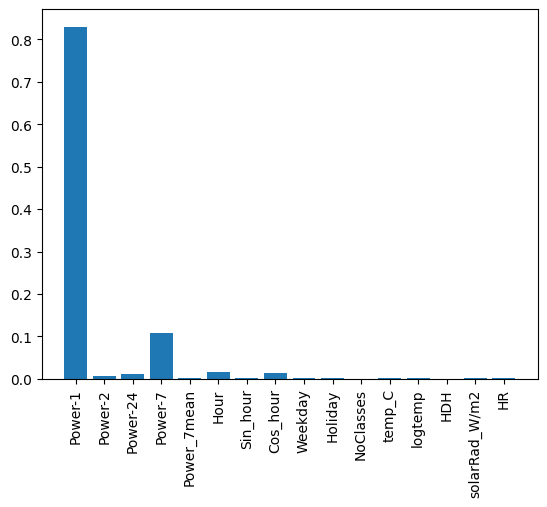

In [52]:
model = RandomForestRegressor()
model.fit(X, Y)
print(model.feature_importances_) 
feature_names = data_clean.columns[1:17] 
plt.bar(feature_names,model.feature_importances_)
plt.xticks(rotation=90) 

In [53]:
feature_names = data_clean.columns[1:17]  # feature names from data_clean

rf_importances = model.feature_importances_ # feature importances from Random Forest

rfe_rankings = fit3.ranking_  # RFE rankings

rf_sorted = sorted(zip(feature_names, rf_importances), key=lambda x: x[1], reverse=True) # Sort features by Random Forest importance

rfe_sorted = sorted(zip(feature_names, rfe_rankings), key=lambda x: x[1]) # Sort features by RFE ranking 

print(" Feature Ranking by Random Forest:")
for i, (feature, importance) in enumerate(rf_sorted, 1):
    print(f"{i}. {feature}: {importance:.4f}")

print(" Feature Ranking by RFE:")
for i, (feature, rank) in enumerate(rfe_sorted, 1):
    print(f"{i}. {feature}: Rank {rank}")


 Feature Ranking by Random Forest:
1. Power-1: 0.8297
2. Power-7: 0.1078
3. Hour: 0.0158
4. Cos_hour: 0.0142
5. Power-24: 0.0116
6. Power-2: 0.0062
7. Power_7mean: 0.0029
8. solarRad_W/m2: 0.0023
9. Holiday: 0.0023
10. Weekday: 0.0019
11. Sin_hour: 0.0011
12. logtemp: 0.0011
13. temp_C: 0.0011
14. HR: 0.0010
15. HDH: 0.0006
16. NoClasses: 0.0005
 Feature Ranking by RFE:
1. Holiday: Rank 1
2. NoClasses: Rank 1
3. logtemp: Rank 1
4. Sin_hour: Rank 2
5. Cos_hour: Rank 3
6. Power-1: Rank 4
7. Power-7: Rank 5
8. temp_C: Rank 6
9. Weekday: Rank 7
10. Hour: Rank 8
11. Power-2: Rank 9
12. HDH: Rank 10
13. Power-24: Rank 11
14. Power_7mean: Rank 12
15. HR: Rank 13
16. solarRad_W/m2: Rank 14


In [54]:
data_clean = data_clean.drop(columns=['Power-2', 'Power_7mean', 'Hour', 'Sin_hour', 
                              'Weekday', 'temp_C', 'HDH', 'solarRad_W/m2', 'HR','Holiday'])
data_clean

,Power_kW,Power-1,Power-24,Power-7,Cos_hour,NoClasses,logtemp
2017-01-01 00:00:00,42.996430,42.996430,42.996430,42.996430,-1.455000,1,2.165619
2017-01-01 01:00:00,42.751928,42.996430,42.751928,42.751928,1.155225,1,2.138889
2017-01-01 02:00:00,42.861834,42.751928,42.861834,42.861834,3.686724,1,2.064011
2017-01-01 03:00:00,42.317769,42.861834,42.317769,42.317769,5.966979,1,1.975804
2017-01-01 04:00:00,42.653385,42.317769,42.653385,42.653385,7.840594,1,1.919432
...,...,...,...,...,...,...,...
2018-12-31 19:00:00,70.132164,102.898642,47.601318,71.888248,-9.933049,1,2.609886
2018-12-31 20:00:00,58.661569,70.132164,47.871384,56.508252,-9.295594,1,2.592390
2018-12-31 21:00:00,43.897742,58.661569,45.990754,41.890383,-8.024660,1,2.550226
2018-12-31 22:00:00,41.808445,43.897742,45.572764,39.143183,-6.206858,1,2.530915


##### The two methods selected different features, naturally depending how they are both constructed. RF is better at expressing non-linear relationships but may include redundant features. It was decided to keep the best features presented by each method. Namely Power-1 (both), Power-24 (RF), Power-7 (both), Cos_hour (both), NoClasses (RFE), logtemp (RFE). Holiday is already included in NoClasses.

# Regression

##### In this section, Time Series analysis is performed, the data is splitted into training and test data and various basic and advanced regression models are applied.

## Time series

In [55]:
from sklearn.model_selection import train_test_split
from sklearn import  metrics
import statsmodels.api as sm

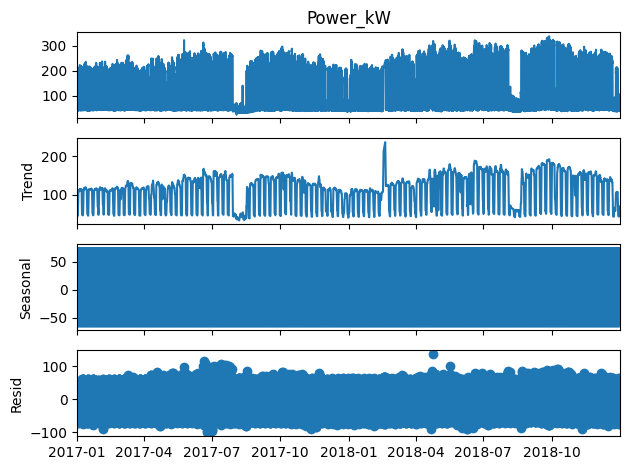

In [56]:
freq = 24

res = sm.tsa.seasonal_decompose(data_clean['Power_kW'],
                                period=freq,
                                model='additive')
#model='additive'
resplot = res.plot()

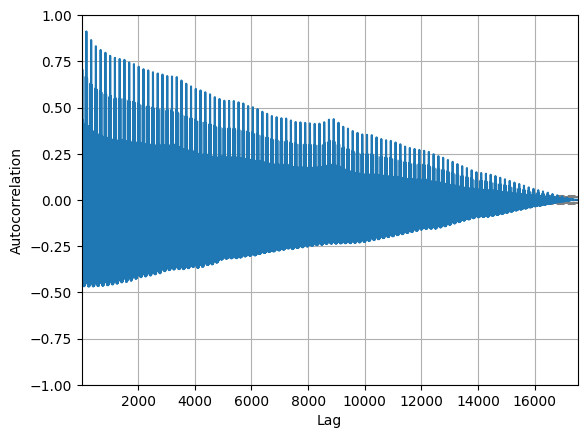

In [57]:
from pandas.plotting import autocorrelation_plot
from matplotlib import pyplot
autocorrelation_plot(data_clean['Power_kW'])
plt.show()

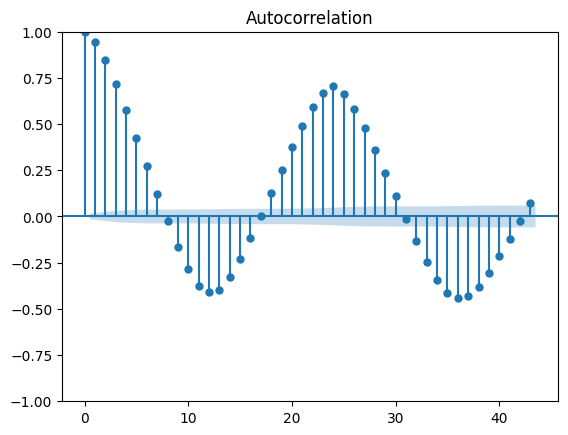

In [58]:
from statsmodels.graphics.tsaplots import plot_acf
from matplotlib import pyplot
plot_acf(data_clean['Power_kW'])
plt.show()

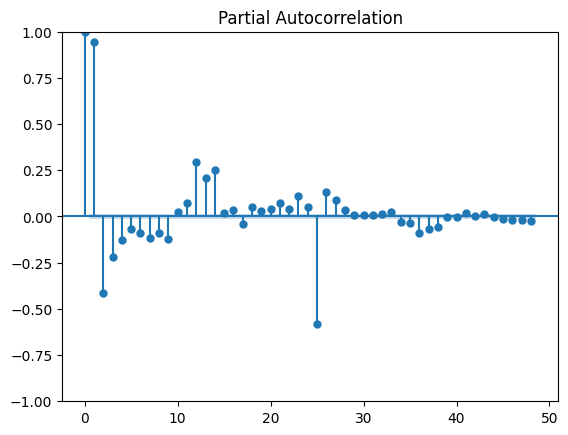

In [59]:
from statsmodels.graphics.tsaplots import plot_pacf
from matplotlib import pyplot
plot_pacf(data_clean['Power_kW'],lags=48) # one day=24 lags / one week 24*7=168 lags
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

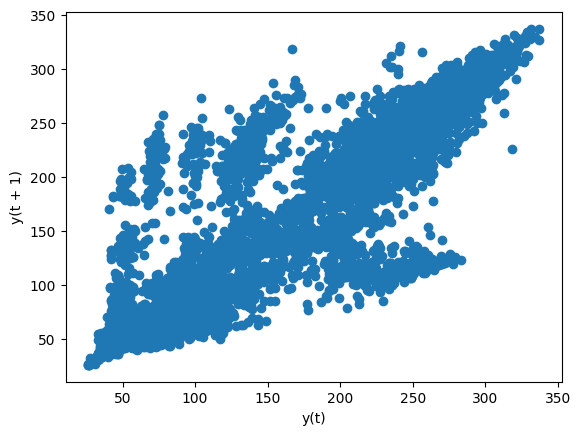

In [60]:
from pandas.plotting import lag_plot
lag_plot(data_clean['Power_kW'])
plt.show

##### Autocorrelation plots show a trend in the data with a seasonal and cyclic behaviour. The last Lag plot shows a diagonal pattern that represent strong correlation between past and future values. Even though there is some dispersion the data shows a linear pattern.

## Data splitting

In [61]:
Z=data_clean.values

Y=Z[:,0]
X=Z[:,[1,2,3,4,5,6]]

#by default, it chooses randomly 75% of the data for training and 25% for testing
X_train, X_test, y_train, y_test = train_test_split(X,Y)

## Basic Regression

### AutoRegressive

In [62]:
from statsmodels.tsa.ar_model import AutoReg

split_point = len(Y) - 4000
train, test = Y[0:split_point], Y[split_point:]

window = 1
model = AutoReg(train, lags=window)
model_fit = model.fit()

print(model_fit.summary())

                            AutoReg Model Results                             
Dep. Variable:                      y   No. Observations:                13520
Model:                     AutoReg(1)   Log Likelihood              -64081.014
Method:               Conditional MLE   S.D. of innovations             27.692
Date:                Fri, 27 Jun 2025   AIC                         128168.028
Time:                        16:55:54   BIC                         128190.564
Sample:                             1   HQIC                        128175.543
                                13520                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.3457      0.392     16.174      0.000       5.577       7.115
y.L1           0.9407      0.003    322.393      0.000       0.935       0.946
                                    Roots           

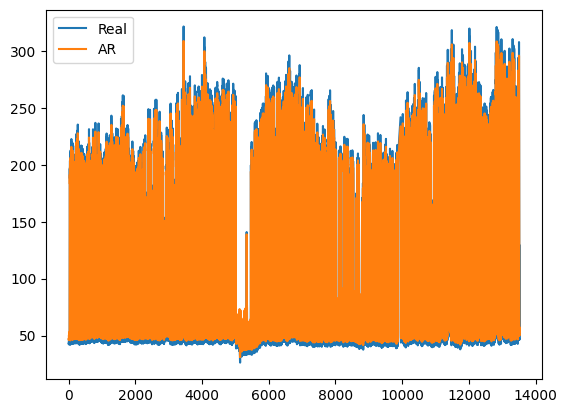

In [63]:
plt.plot(train,label='Real')
plt.plot(model_fit.fittedvalues,label='AR')
plt.legend()

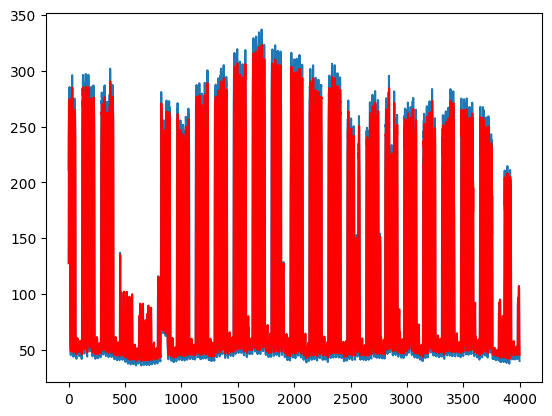

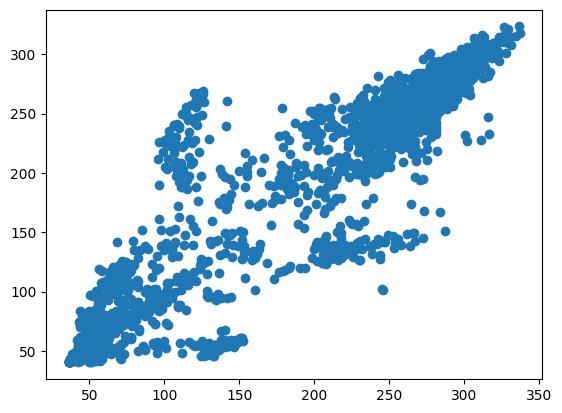

In [64]:
from sklearn.metrics import mean_squared_error
from math import sqrt

coef = model_fit.params

# walk forward over time steps in test
history = train[len(train)-window:]
history = [history[i] for i in range(len(history))]
predictions = list()
for t in range(len(test)):
    length = len(history)
    lag = [history[i] for i in range(length-window,length)]
    yhat = coef[0]
    for d in range(window):
        yhat += coef[d+1] * lag[window-d-1]
    obs = test[t]
    predictions.append(yhat)
    history.append(obs)

plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

plt.scatter(test,predictions)
plt.show()

In [65]:
MAE_AR=metrics.mean_absolute_error(test,predictions) 
MBE_AR=np.mean(test-predictions) #here we calculate MBE
MSE_AR=metrics.mean_squared_error(test,predictions)  
RMSE_AR= np.sqrt(metrics.mean_squared_error(test,predictions))
cvRMSE_AR=RMSE_AR/np.mean(test)
NMBE_AR=MBE_AR/np.mean(test)
print(MAE_AR, MBE_AR,MSE_AR, RMSE_AR,cvRMSE_AR,NMBE_AR)

16.029122221244425 0.6440636203487914 852.8417396980534 29.203454242572974 0.24713121473959773 0.005450321853856024


### Linear Regression

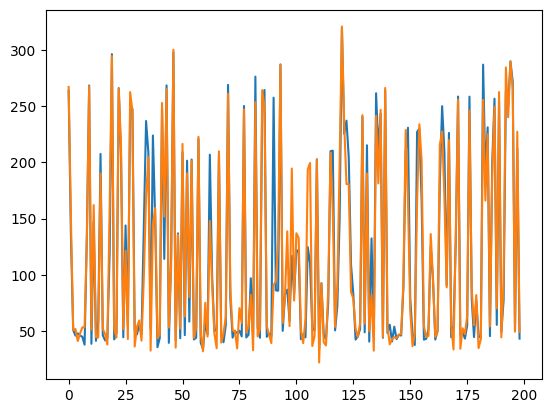

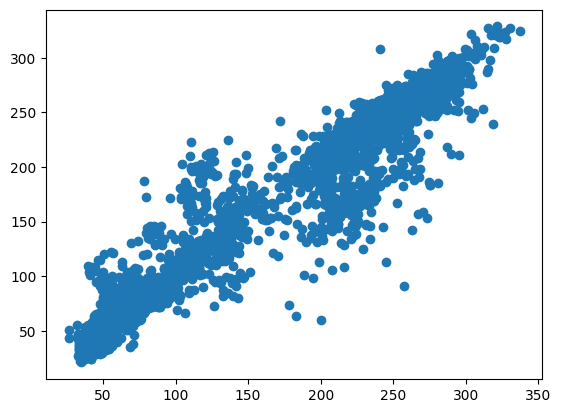

In [66]:
from sklearn import  linear_model

regr = linear_model.LinearRegression() # Create linear regression object

regr.fit(X_train,y_train) # Train the model

y_pred_LR = regr.predict(X_test) # Make predictions 

plt.plot(y_test[1:200])
plt.plot(y_pred_LR[1:200])
plt.show()
plt.scatter(y_test,y_pred_LR)

In [67]:
#Evaluate errors
MAE_LR=metrics.mean_absolute_error(y_test,y_pred_LR) 
MBE_LR=np.mean(y_test- y_pred_LR) #here we calculate MBE
MSE_LR=metrics.mean_squared_error(y_test,y_pred_LR)  
RMSE_LR= np.sqrt(metrics.mean_squared_error(y_test,y_pred_LR))
cvRMSE_LR=RMSE_LR/np.mean(y_test)
NMBE_LR=MBE_LR/np.mean(y_test)
print(MAE_LR, MBE_LR,MSE_LR, RMSE_LR,cvRMSE_LR,NMBE_LR)

12.742122719968394 0.31916488426314815 433.21056921414214 20.813711087024874 0.19232430560773991 0.0029491696355173538


### Support Vector Regressor

In [68]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR

ss_X = StandardScaler()
ss_y = StandardScaler()
X_train_ss = ss_X.fit_transform(X_train)
y_train_ss = ss_y.fit_transform(y_train.reshape(-1,1))

regr = SVR(kernel='linear')
#kernel='linear'
#kernel='sigmoid'
#kernel='rbf'

regr.fit(X_train_ss,y_train_ss)

/opt/homebrew/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(kernel='linear')

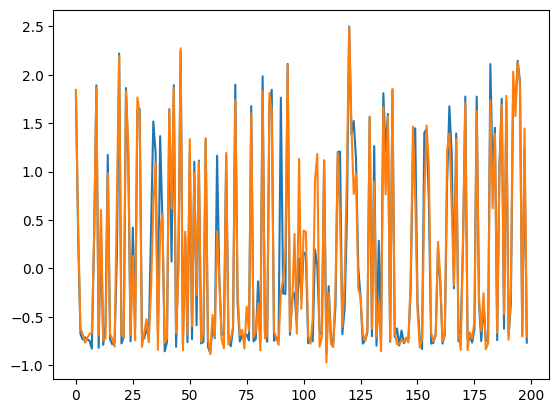

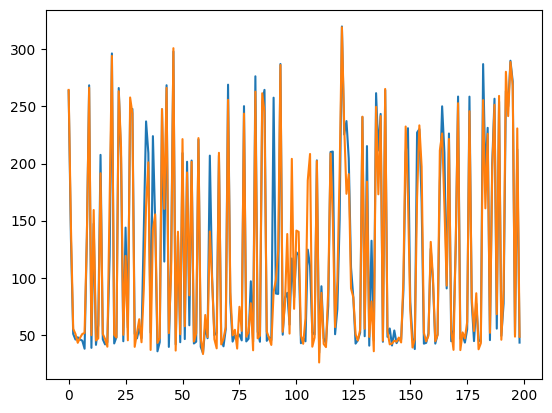

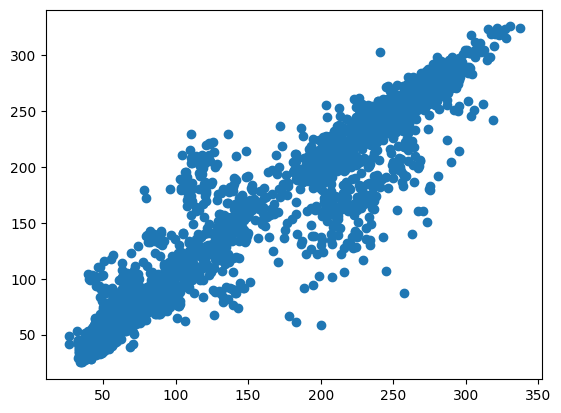

In [69]:
y_pred_SVR = regr.predict(ss_X.fit_transform(X_test))
y_test_SVR=ss_y.fit_transform(y_test.reshape(-1,1))
y_pred_SVR2=ss_y.inverse_transform(y_pred_SVR.reshape(-1,1))

plt.plot(y_test_SVR[1:200])
plt.plot(y_pred_SVR[1:200])
plt.show()
plt.plot(y_test[1:200])
plt.plot(y_pred_SVR2[1:200])
plt.show()
plt.scatter(y_test, y_pred_SVR2)

In [70]:
MAE_SVR=metrics.mean_absolute_error(y_test,y_pred_SVR2) 
MBE_SVR=np.mean(y_test- y_pred_SVR2) #here we calculate MBE
MSE_SVR=metrics.mean_squared_error(y_test,y_pred_SVR2)  
RMSE_SVR= np.sqrt(metrics.mean_squared_error(y_test,y_pred_SVR2))
cvRMSE_SVR=RMSE_SVR/np.mean(y_test)
NMBE_SVR=MBE_SVR/np.mean(y_test)
print(MAE_SVR, MBE_SVR,MSE_SVR, RMSE_SVR,cvRMSE_SVR,NMBE_SVR)

12.068954823537368 0.14809157048505048 445.79922796576096 21.113958131192764 0.19509866929708525 0.0013684060637150022


## Advanced Regression

In [71]:
from sklearn import  metrics
import statsmodels.api as sm

### Decision Tree Regressor

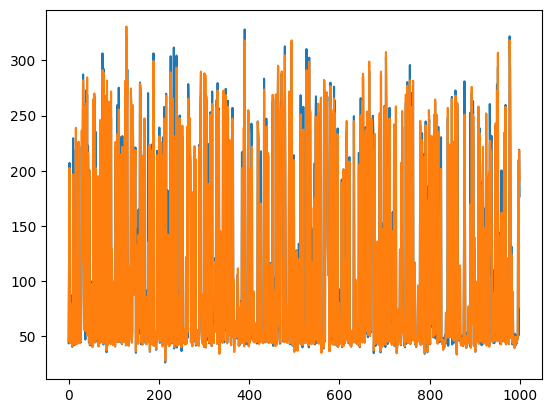

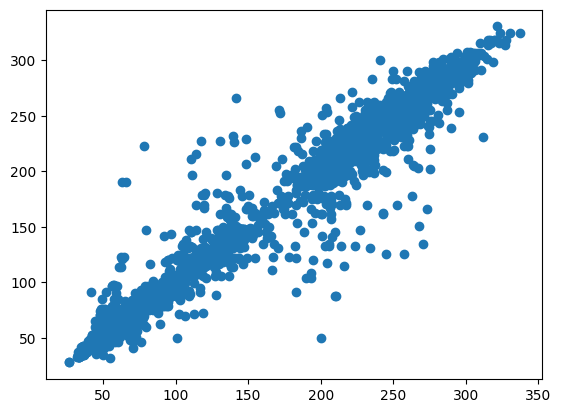

In [72]:
from sklearn.tree import DecisionTreeRegressor

DT_regr_model = DecisionTreeRegressor(min_samples_leaf=5) # Create Regression Decision Tree object

DT_regr_model.fit(X_train, y_train) # Train the model

y_pred_DT = DT_regr_model.predict(X_test) # Make predictions

plt.plot(y_test[1000:2000])
plt.plot(y_pred_DT[1000:2000])
plt.show()
plt.scatter(y_test,y_pred_DT)

In [73]:
#Evaluate errors
MAE_DT=metrics.mean_absolute_error(y_test,y_pred_DT) 
MBE_DT=np.mean(y_test-y_pred_DT) 
MSE_DT=metrics.mean_squared_error(y_test,y_pred_DT)  
RMSE_DT= np.sqrt(metrics.mean_squared_error(y_test,y_pred_DT))
cvRMSE_DT=RMSE_DT/np.mean(y_test)
NMBE_DT=MBE_DT/np.mean(y_test)
print(MAE_DT, MBE_DT,MSE_DT, RMSE_DT,cvRMSE_DT,NMBE_DT)

6.281104284724779 0.1377425209222702 201.87779586826127 14.20837062679114 0.1312891777535294 0.0012727780537681078


### Random Forest

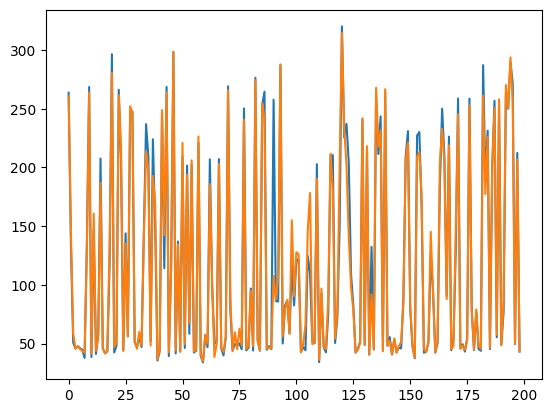

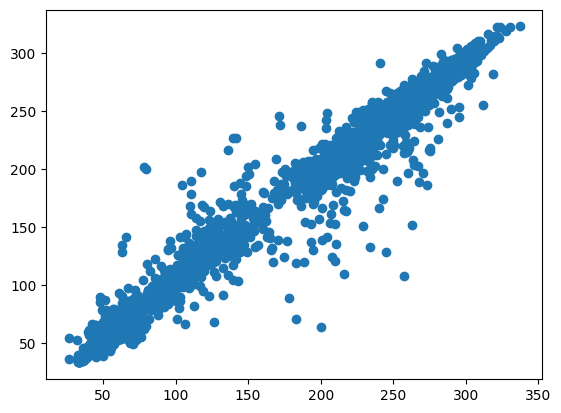

In [74]:
from sklearn.ensemble import RandomForestRegressor

parameters = {'bootstrap': True,
              'min_samples_leaf': 3,
              'n_estimators': 200, 
              'min_samples_split': 15,
              'max_features': 'sqrt',
              'max_depth': 20,
              'max_leaf_nodes': None}
RF_model = RandomForestRegressor(**parameters)
#RF_model = RandomForestRegressor()
RF_model.fit(X_train, y_train)
y_pred_RF = RF_model.predict(X_test)

plt.plot(y_test[1:200])
plt.plot(y_pred_RF[1:200])
plt.show()
plt.scatter(y_test,y_pred_RF)

In [75]:
#Evaluate errors
MAE_RF=metrics.mean_absolute_error(y_test,y_pred_RF) 
MBE_RF=np.mean(y_test-y_pred_DT) #here we calculate MBE
MSE_RF=metrics.mean_squared_error(y_test,y_pred_RF)  
RMSE_RF= np.sqrt(metrics.mean_squared_error(y_test,y_pred_RF))
cvRMSE_RF=RMSE_RF/np.mean(y_test)
NMBE_RF=MBE_RF/np.mean(y_test)
print(MAE_RF,MBE_RF,MSE_RF,RMSE_RF,cvRMSE_RF,NMBE_RF)

5.777743000740458 0.1377425209222702 155.35076012828736 12.463978503202233 0.11517052392605369 0.0012727780537681078


### Extreme Gradient Boosting

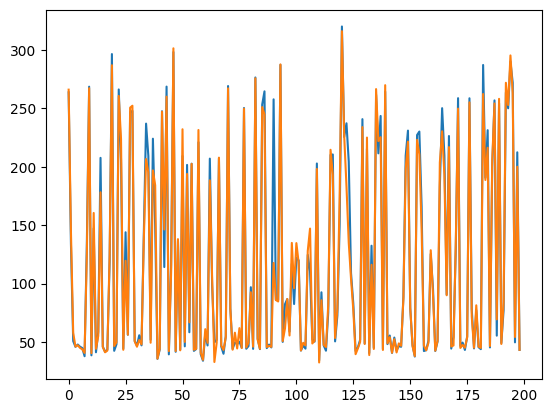

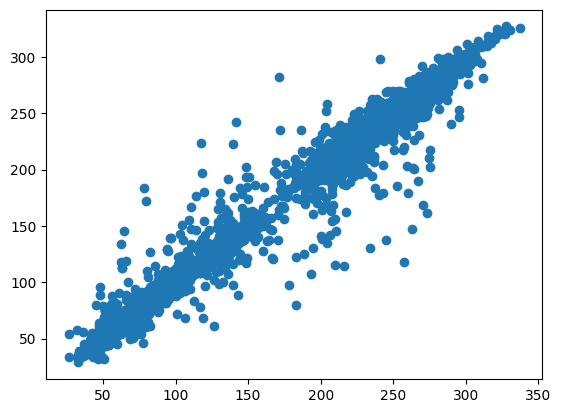

In [76]:
from xgboost import XGBRegressor

XGB_model = XGBRegressor()
XGB_model.fit(X_train, y_train)
y_pred_XGB =XGB_model.predict(X_test)

plt.plot(y_test[1:200])
plt.plot(y_pred_XGB[1:200])
plt.show()
plt.scatter(y_test,y_pred_XGB)

In [77]:
MAE_XGB=metrics.mean_absolute_error(y_test,y_pred_XGB) 
MBE_XGB=np.mean(y_test-y_pred_XGB)
MSE_XGB=metrics.mean_squared_error(y_test,y_pred_XGB)  
RMSE_XGB= np.sqrt(metrics.mean_squared_error(y_test,y_pred_XGB))
cvRMSE_XGB=RMSE_XGB/np.mean(y_test)
NMBE_XGB=MBE_XGB/np.mean(y_test)
print(MAE_XGB,MBE_XGB,MSE_XGB,RMSE_XGB,cvRMSE_XGB,NMBE_XGB)

5.593255117205118 0.11231806967095392 145.1135823522003 12.046309906033478 0.11131115340876446 0.0010378492651478281


### Bootstrapping

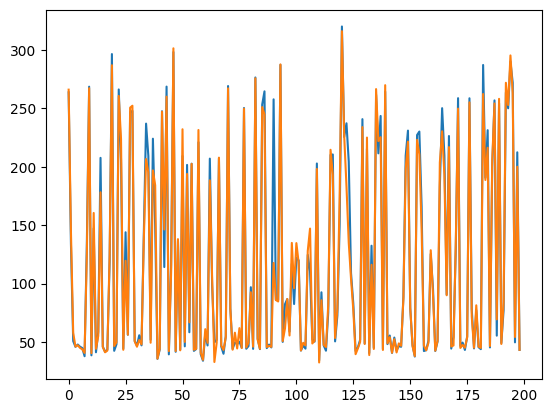

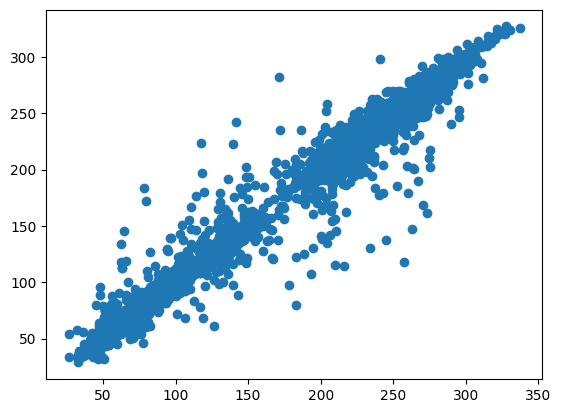

In [78]:
from sklearn.ensemble import BaggingRegressor

BT_model = BaggingRegressor()
BT_model.fit(X_train, y_train)
y_pred_BT =BT_model.predict(X_test)

plt.plot(y_test[1:200])
plt.plot(y_pred_XGB[1:200])
plt.show()
plt.scatter(y_test,y_pred_XGB)

In [79]:
MAE_BT=metrics.mean_absolute_error(y_test,y_pred_BT) 
MBE_BT=np.mean(y_test-y_pred_BT)
MSE_BT=metrics.mean_squared_error(y_test,y_pred_BT)  
RMSE_BT= np.sqrt(metrics.mean_squared_error(y_test,y_pred_BT))
cvRMSE_BT=RMSE_BT/np.mean(y_test)
NMBE_BT=MBE_BT/np.mean(y_test)
print(MAE_BT,MBE_BT,MSE_BT,RMSE_BT,cvRMSE_BT,NMBE_BT)

5.5116982881050225 -0.010205731637312357 157.29126585500327 12.541581473442784 0.11588759630695726 -9.430371365098097e-05


### Neural Networks

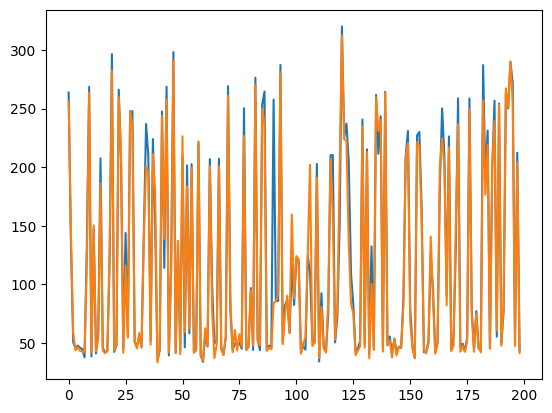

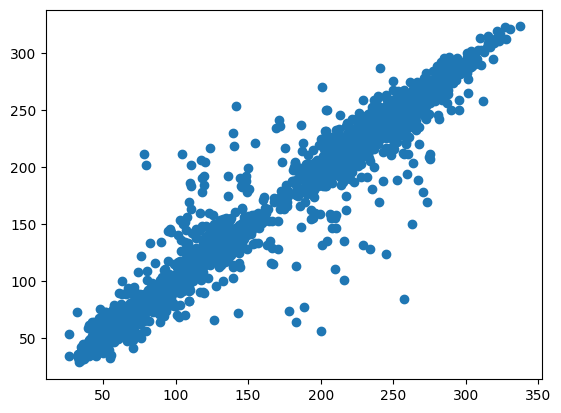

In [80]:
from sklearn.neural_network import MLPRegressor

NN_model = MLPRegressor(hidden_layer_sizes=(100,100),max_iter=300)
NN_model.fit(X_train,y_train)
y_pred_NN = NN_model.predict(X_test)

plt.plot(y_test[1:200])
plt.plot(y_pred_NN[1:200])
plt.show()
plt.scatter(y_test,y_pred_NN)

In [81]:
MAE_NN=metrics.mean_absolute_error(y_test,y_pred_NN)
MBE_NN=np.mean(y_test-y_pred_NN)
MSE_NN=metrics.mean_squared_error(y_test,y_pred_NN)  
RMSE_NN= np.sqrt(metrics.mean_squared_error(y_test,y_pred_NN))
cvRMSE_NN=RMSE_NN/np.mean(y_test)
NMBE_NN=MBE_NN/np.mean(y_test)
print(MAE_NN,MBE_NN,MSE_NN,RMSE_NN,cvRMSE_NN,NMBE_NN)

6.606065683054889 1.667819685940444 183.68364015177386 13.552993770815872 0.12523331879546964 0.015411103845742135


In [82]:
import joblib 
joblib.dump(XGB_model, 'XGB_model.sav')
joblib.dump(NN_model, 'NN_model.sav')
joblib.dump(BT_model, 'BT_model.sav')
joblib.dump(RF_model, 'RF_model.sav')


import pickle
with open("XGB_model.pkl", "wb") as file:
    pickle.dump(model, file)


##### It is possible to construct a model even without features as shown by AutoRegressive. The statistical model with features Linear Regression improves the prediction as shown particularly by MAE and RMSE values. ML learning algorithms make possible to create very accurate models as shown by XGBoost, Bootstrapping and Random Forest that present the lowest MAE and RMSE values. It was decided to proceed with XGBoost as the best model with RMSE value around 10% of the mean. The Power values range mostly from 200kw to 300kw and the RMSE is less than 5% of this value for XGBoost.

# Validation

In this section, the 2019 testing data is prepared following a similar approach as the 2017 and 2018 data, and the required features are added. The power consumption forecast for 2019 with the chosen model is compared to real data.

## Data Preparation

In [83]:
data_test = pd.read_csv('/Users/joaosantos/Documents/MEFT/P3/SE/Project1/MyProject1/testData_2019_NorthTower.csv')

In [84]:
data_test[data_test.isnull().any(axis = 'columns')] #check if there are any NaN in test data

,Date,North Tower (kWh),temp_C,HR,windSpeed_m/s,windGust_m/s,pres_mbar,solarRad_W/m2,rain_mm/h,rain_day


In [85]:
data_test

,Date,North Tower (kWh),temp_C,HR,windSpeed_m/s,windGust_m/s,pres_mbar,solarRad_W/m2,rain_mm/h,rain_day
0,2019-01-01 00:00:00,43.537,10.635833,62.684167,0.0,0.0,1031.000000,2.543250,0.0,0.0
1,2019-01-01 01:00:00,43.221,10.377500,62.836667,0.0,0.0,1031.000000,1.728667,0.0,0.0
2,2019-01-01 02:00:00,43.231,10.260833,61.720000,0.0,0.0,1031.083333,2.674750,0.0,0.0
3,2019-01-01 03:00:00,43.434,9.666667,63.893333,0.0,0.0,1031.083333,2.444250,0.0,0.0
4,2019-01-01 04:00:00,42.527,8.640833,68.034167,0.0,0.0,1031.000000,3.056333,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
2410,2019-04-11 11:00:00,251.734,15.615000,47.215000,0.0,0.0,1022.083333,869.200000,0.0,0.0
2411,2019-04-11 12:00:00,256.433,15.872500,46.630000,0.0,0.0,1022.000000,640.591667,0.0,0.0
2412,2019-04-11 13:00:00,259.927,16.315833,45.955833,0.0,0.0,1021.416667,855.808333,0.0,0.0
2413,2019-04-11 14:00:00,271.692,15.755455,45.820909,0.0,0.0,1021.090909,625.072727,0.0,0.0


In [86]:
data_test.info()

data_test['Date'] = pd.to_datetime(data_test['Date'], errors='coerce')
data_test = data_test.set_index ('Date', drop = True)

data_test.to_csv('IST_North_Tower_2019_raw.csv', encoding='utf-8', index=True) 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2415 entries, 0 to 2414
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               2415 non-null   object 
 1   North Tower (kWh)  2415 non-null   float64
 2   temp_C             2415 non-null   float64
 3   HR                 2415 non-null   float64
 4   windSpeed_m/s      2415 non-null   float64
 5   windGust_m/s       2415 non-null   float64
 6   pres_mbar          2415 non-null   float64
 7   solarRad_W/m2      2415 non-null   float64
 8   rain_mm/h          2415 non-null   float64
 9   rain_day           2415 non-null   float64
dtypes: float64(9), object(1)
memory usage: 188.8+ KB


In [87]:
data_test = data_test.drop(columns=['windSpeed_m/s', 'windGust_m/s', 'pres_mbar', 'rain_mm/h', 'rain_day'])
data_test

,North Tower (kWh),temp_C,HR,solarRad_W/m2
Date,,,,
2019-01-01 00:00:00,43.537,10.635833,62.684167,2.543250
2019-01-01 01:00:00,43.221,10.377500,62.836667,1.728667
2019-01-01 02:00:00,43.231,10.260833,61.720000,2.674750
2019-01-01 03:00:00,43.434,9.666667,63.893333,2.444250
2019-01-01 04:00:00,42.527,8.640833,68.034167,3.056333
...,...,...,...,...
2019-04-11 11:00:00,251.734,15.615000,47.215000,869.200000
2019-04-11 12:00:00,256.433,15.872500,46.630000,640.591667
2019-04-11 13:00:00,259.927,16.315833,45.955833,855.808333


In [88]:
#The features are added following the same approach as done for the 2018 and 2018 data

data_test['Power-1']=data_test['North Tower (kWh)'].shift(1) # Previous hour consumption
data_test.loc[data_test.index[0], 'Power-1'] = data_test.iloc[1]['Power-1']

#data_test['Power-2']=data_test['North Tower (kWh)'].shift(2) # Previous hour consumption
#data_test.loc[data_test.index[0], 'Power-2'] = data_test.iloc[2]['Power-2']
#data_test.loc[data_test.index[1], 'Power-2'] = data_test.iloc[2]['Power-2']

data_test['Power-24'] = data_test['North Tower (kWh)'].shift(24) # Power 24 hours ago
data_test['Power-24'].fillna(data_test['North Tower (kWh)'], inplace=True) # Fill NaN values in 'Power-24' with the corresponding 'Power_kW' value

data_test['Power-7'] = data_test['North Tower (kWh)'].shift(168) # Power 1 weak ago
data_test['Power-7'].fillna(data_test['North Tower (kWh)'], inplace=True) # Fill NaN values in 'Power-7' with the corresponding 'Power_kW' value

data_test['logtemp']=np.log(data_test['temp_C']) #Log of temperature

portugal_holidays = holidays.Portugal(years=[2019]) # Portugal holidays 
data_test['Holiday'] = data_test.index.map(lambda x: 1 if x.date() in portugal_holidays else 0) # 1 if the date is a holiday, 0 otherwise
periods = [
    ("2018-02-06", "2018-02-17"), #EndSemester
    ("2018-03-04", "2018-03-05"), #Carnival
    ("2018-04-15", "2018-04-19"), #Easter
    ("2018-07-27", "2018-09-08"), #Summer
    ("2018-12-21", "2018-12-31"), #Christmas
]
periods = [(pd.to_datetime(start), pd.to_datetime(end)) for start, end in periods]
# Create a new column: 1 if the date is within any period, 0 otherwise
data_test['NoClasses'] = data_test.index.map(lambda x: any(start.date() <= x.date() <= end.date() for start, end in periods)).astype(int)
data_test['NoClasses'] = data_test['NoClasses'] | data_test['Holiday']

/var/folders/fx/jrk_c9yx0476s6k5m7vj86v40000gn/T/ipykernel_8354/194880765.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_test['Power-24'].fillna(data_test['North Tower (kWh)'], inplace=True) # Fill NaN values in 'Power-24' with the corresponding 'Power_kW' value
/var/folders/fx/jrk_c9yx0476s6k5m7vj86v40000gn/T/ipykernel_8354/194880765.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This in

In [89]:
data_test['Hour'] = data_test.index.hour # Add Hour column
amp=1/24
time=data_test['Hour'].values
data_test['Cos_hour'] = 10 * np.cos(2 * np.pi * amp * time -8) #Add cos_hour column

In [90]:
data_test = data_test.drop(columns=['temp_C', 'HR','solarRad_W/m2','Hour','Holiday']) #drop features not used
data_test.dropna()
data_test.to_csv('IST_North_Tower_test.csv', encoding='utf-8', index=True) 
data_test

,North Tower (kWh),Power-1,Power-24,Power-7,logtemp,NoClasses,Cos_hour
Date,,,,,,,
2019-01-01 00:00:00,43.537,43.537,43.537,43.537,2.364229,1,-1.455000
2019-01-01 01:00:00,43.221,43.537,43.221,43.221,2.339640,1,1.155225
2019-01-01 02:00:00,43.231,43.221,43.231,43.231,2.328334,1,3.686724
2019-01-01 03:00:00,43.434,43.231,43.434,43.434,2.268684,1,5.966979
2019-01-01 04:00:00,42.527,43.434,42.527,42.527,2.156499,1,7.840594
...,...,...,...,...,...,...,...
2019-04-11 11:00:00,251.734,243.147,282.443,265.937,2.748232,0,3.966070
2019-04-11 12:00:00,256.433,251.734,281.400,257.517,2.764588,0,1.455000
2019-04-11 13:00:00,259.927,256.433,280.494,255.506,2.792136,0,-1.155225


## Forecast for 2019

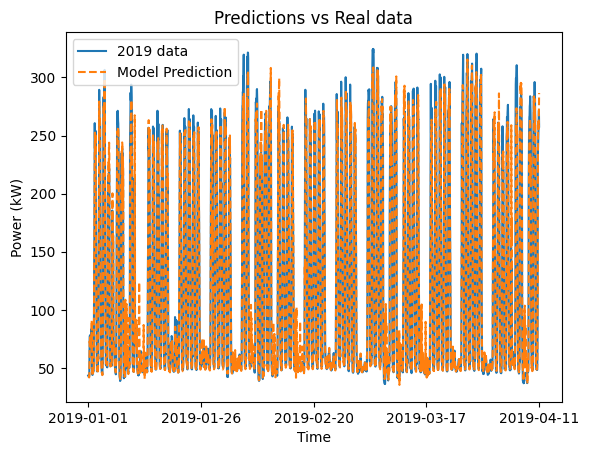

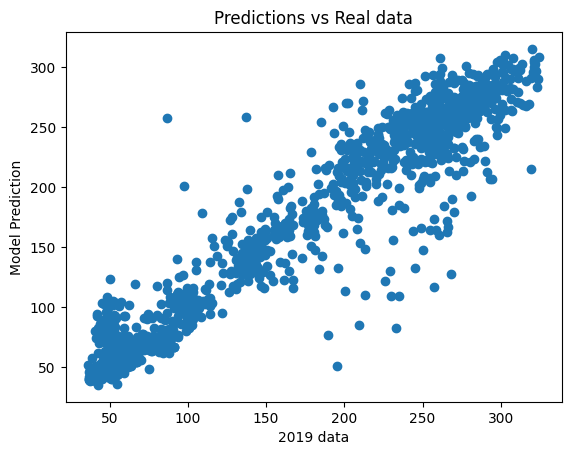

In [91]:

Z=data_test.values
Y=Z[:,0]
X=Z[:,[1,2,3,6,5,4]] #Switch 4 for 6 column to have the same configuration

y_pred_2019 = XGB_model.predict(X)

plt.plot(data_test.index, Y, label="2019 data")
plt.plot(data_test.index, y_pred_2019, label="Model Prediction", linestyle="dashed")
plt.legend()
plt.xlabel("Time")
plt.ylabel("Power (kW)")
plt.title("Predictions vs Real data")
num_ticks = 5  # Number of x-axis labels
tick_indices = np.linspace(0, len(data_test.index) - 1, num_ticks, dtype=int)  # Select 5 evenly spaced indices
plt.xticks(data_test.index[tick_indices]) 
plt.savefig('regression.png')
plt.show()

plt.scatter(Y,y_pred_2019)
plt.xlabel("2019 data")
plt.ylabel("Model Prediction")
plt.title("Predictions vs Real data")
plt.savefig('scatter.png')

In [92]:
MAE=metrics.mean_absolute_error(Y,y_pred_2019) 
MBE=np.mean(Y-y_pred_2019)
MSE=metrics.mean_squared_error(Y,y_pred_2019)  
RMSE= np.sqrt(metrics.mean_squared_error(Y,y_pred_2019))
cvRMSE=RMSE/np.mean(Y)
NMBE=MBE/np.mean(Y)
print(MAE,MBE,MSE,RMSE,cvRMSE,NMBE)

10.520770268435903 1.2529218856527202 392.15584886354003 19.802925260262434 0.16535204524058836 0.010461747120517404


##### The model sucessfully predicted 2019 power consumption as shown by the plots and the metrics. cvRMSE is less than 20% and NMBE less than 2% which is in line with energy modelling standards.